In [1]:
import numpy as np
import pandas as pd

In [2]:
#to load in the npy file as a numpy array
data_broccoli = np.load('../raw_data/broccoli.npy')

#checking shape of data
data_broccoli.shape

(132826, 784)

In [23]:
class_name = os.path.splitext(filenames[0])[0]
class_name

'alarmclock'

In [3]:
#making list of filenames to load locally

filenames = ["alarmclock.npy", "bicycle.npy", "boomerang.npy", "bread.npy", "broccoli.npy", "lantern.npy", "lightning.npy", "streetlight.npy", "tennis racquet.npy", "tractor.npy"]

In [25]:
#creating X, y and index to use for the loop and a label_names for making a list to check the y-label
X = np.empty([0, 784])
y = np.empty([0])
index = 0
label_names = []

#setting a max per class to retrieve from npy file, we taking 5000 subjects per label for training
max_items_per_class = 5000

In [26]:
#loading data from the npy files. taking 5000 per label and creating a (y)target using the index starting from 1.
import os

for fname in filenames:
    label_name = os.path.splitext(fname)[0]
    label_names.append(label_name) if label_name not in label_names else label_names
    data = np.load('../raw_data/' + fname)
    data = data[0: max_items_per_class, :]
    label = np.full(data.shape[0], index)
    y = np.append(y, label)
    X = np.concatenate((X, data), axis=0)
    index += 1

In [27]:
#printing label names 
label_names

['alarmclock',
 'bicycle',
 'boomerang',
 'bread',
 'broccoli',
 'lantern',
 'lightning',
 'streetlight',
 'tennis racquet',
 'tractor']

In [6]:
#checking shape of the X after looping the filenames
X.shape

(50000, 784)

In [7]:
#reshaping to (28,28)

X = X.reshape(50000,28,28)
X.shape

(50000, 28, 28)

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

In [9]:
#making test and training set with train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
X_train.shape

(40000, 28, 28)

In [17]:
y_train[6]

5.0

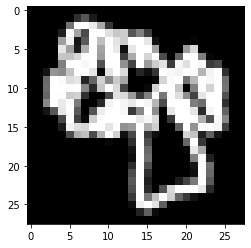

In [16]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
plt.imshow(X_train[6], cmap='gray') 